## Hands-on - Probability Distributions and Variability

In [48]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr, spearmanr, kendalltau

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/refs/heads/main/fcc-forum-pageviews.csv"
df = pd.read_csv(file_path)

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(5))  # Display the first 5 rows of the dataset

Dataset Preview:
         date  value
0  2016-05-09   1201
1  2016-05-10   2329
2  2016-05-11   1716
3  2016-05-12  10539
4  2016-05-13   6933


### **Question 1: Check for missing values**
- Check for any **missing values** in each colum.

In [2]:
missing = df.isnull().sum()
print(missing)

date     0
value    0
dtype: int64


### **Question 2: Compute the Covariance Between Consecutive Days**
- Create a new column: **Previous Day Views"**, which contains the previous day's pageviews.
- Compute the covariance between **"value"** (current day's views) and **"Previous Day Views"**.


         date  value  Previous Day Views
0  2016-05-09   1201                 0.0
1  2016-05-10   2329              1201.0
2  2016-05-11   1716              2329.0
3  2016-05-12  10539              1716.0
4  2016-05-13   6933             10539.0
Covariance Matrix:
                           value  Previous Day Views
value               3.521193e+09        2.419367e+09
Previous Day Views  2.419367e+09        3.518245e+09


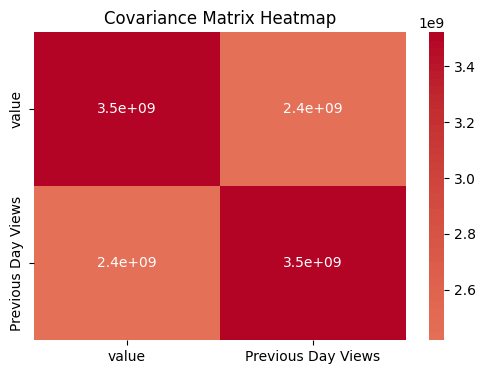

In [3]:
import seaborn as sns

df['Previous Day Views'] = df['value'].shift(1).fillna(0)
print(df.head(5))

cov_matrix = df[['value', 'Previous Day Views']].cov()
print("Covariance Matrix:")
print(cov_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Covariance Matrix Heatmap')
plt.show()

The diagonal value 3.53e+09 represent the variance of current day's view and Previous day view respectively.

The off-singal value 2.4e+09 repensent the covariance between current day's view and previous day views, it is positive and large. It indicates a strong linear relationship between the view and the day before it. 

Conclusion: The current day views and previous day view tend to increase or decrease together.

### **Question 3: Compute Pearson, Spearman, and Kendall Correlation Between Pageviews and Previous Day Views**
- Compute and compare three different correlation measures.?

Pearson Correlation Coefficient:
                       value  Previous Day Views
value               1.000000            0.687375
Previous Day Views  0.687375            1.000000

Spearman Correlation Coefficient:
                       value  Previous Day Views
value               1.000000            0.933075
Previous Day Views  0.933075            1.000000

Kendall Correlation Coefficient:
                       value  Previous Day Views
value               1.000000            0.789043
Previous Day Views  0.789043            1.000000


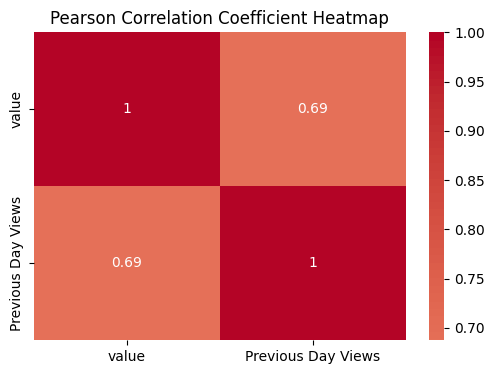

In [4]:
pearson_corr = df[['value', 'Previous Day Views']].corr(method='pearson')
sprearman_corr = df[['value', 'Previous Day Views']].corr(method='spearman')
kendall_corr = df[['value', 'Previous Day Views']].corr(method='kendall')

print("Pearson Correlation Coefficient:")
print(pearson_corr)
print("\nSpearman Correlation Coefficient:")
print(sprearman_corr)
print("\nKendall Correlation Coefficient:")
print(kendall_corr)

plt.figure(figsize=(6, 4))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Coefficient Heatmap')
plt.show()


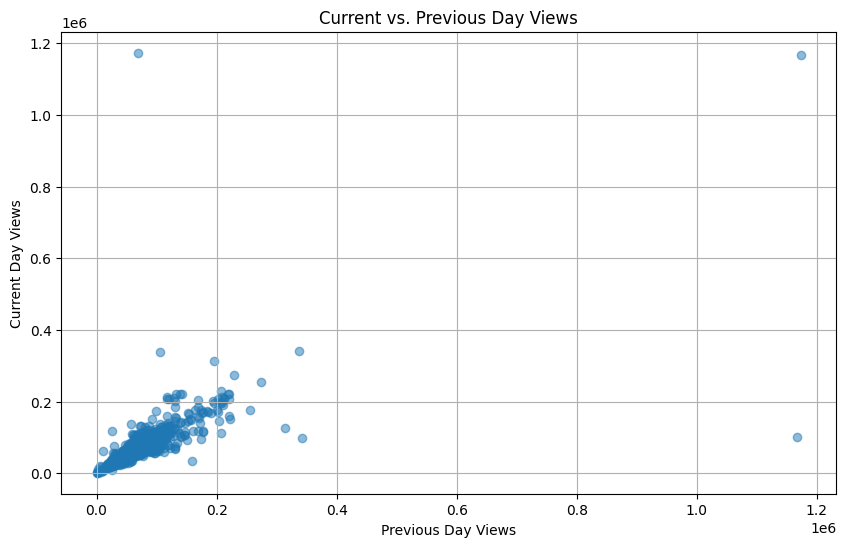

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Previous Day Views'], df['value'], alpha=0.5)
plt.title("Current vs. Previous Day Views")
plt.xlabel("Previous Day Views")
plt.ylabel("Current Day Views")
plt.grid(True)
plt.show()

1. Pearson Correlation (0.69): This indicates a ​moderately strong positive linear relationship between current-day views and previous-day views. While the two variables tend to move in the same direction, the linear association is not particularly strong.
2. Spearman Correlation (0.93): This reflects a ​very strong monotonic relationship. If the previous day’s views are higher, the next day’s views are ​highly likely to also be higher, suggesting the website consistently retains or attracts users over time.
3. Kendall Correlation (0.79): Similar to Spearman’s result, this confirms a ​strong monotonic relationship, though slightly weaker due to differences in how ties (identical values) are handled.

Current-day views and previous-day views exhibit ​highly consistent trends, but the relationship is ​not purely linear (as supported by the graph). The strong monotonic correlations (Spearman and Kendall) suggest that daily views follow a stable upward/downward pattern, even if the trend isn’t strictly linear.

##### this paragraph's grammer was checked and modified by AI, but the main idea was generate by myself.

### **Question 4: Train a Simple Linear Regression Model to Predict Pageviews**
- Convert **"date"** to numeric values (days since the start).
- Train a linear regression model to predict **"value"** (pageviews) using time.**.


In [32]:
from sklearn.model_selection import train_test_split

df['date'] = pd.to_datetime(df['date'])
print(df[['date']].dtypes)

start_date = df['date'].min()
df['day_since_start'] = (df['date'] - start_date).dt.days

print(df.head(5))

x = df[['day_since_start']]
y = df['value']

x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.2, 
    random_state=42
)

# Initialize and fit a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


date    datetime64[ns]
dtype: object
        date  value  Previous Day Views  day_since_start
0 2016-05-09   1201                 0.0                0
1 2016-05-10   2329              1201.0                1
2 2016-05-11   1716              2329.0                2
3 2016-05-12  10539              1716.0                3
4 2016-05-13   6933             10539.0                4


### **Question 5: Evaluate the Regression Model**
- Compute R-squared and Mean Squared Error (MSE).
- Discuss the model's performance.


In [33]:
print(f"\nModel Coefficients:\n{model.coef_[0]:.2f}")
print("R-squared:", round(r2_score(y_test, y_pred),2)) 
print("Mean Squared Error:", round(mean_squared_error(y_test, y_pred),2))


Model Coefficients:
87.15
R-squared: 0.23
Mean Squared Error: 5013656953.87


The linear regression results suggest that, ​on average, pageviews increase by 87 units per day (coefficient = 87.15). However, the ​low R-squared value (0.23) indicates that the model explains only 23% of the variance in the data, implying that ​time (days) alone is insufficient to predict pageviews accurately.

Additionally, the ​extremely high Mean Squared Error (MSE = 5,013,656,953) highlights two critical issues: 
1. ​Outliers heavily distort predictions: Sudden spikes or drops in pageviews disproportionately affect the model’s performance.
2. ​Nonlinear patterns may exist: The relationship between time and pageviews is likely nonlinear, which a simple linear model cannot capture.

In [ ]:
#try polynomial regression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = make_pipeline(
    PolynomialFeatures(degree=3), 
    LinearRegression()
)
poly.fit(x_train, y_train)

y_pred = poly.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R²: {r2:.2f}")

# Still high MSE and low R², indicating that the model is not fitting the data well.

MSE: 4861720582.71, R²: 0.25


MSE: 1267683719.49, R²: 0.80


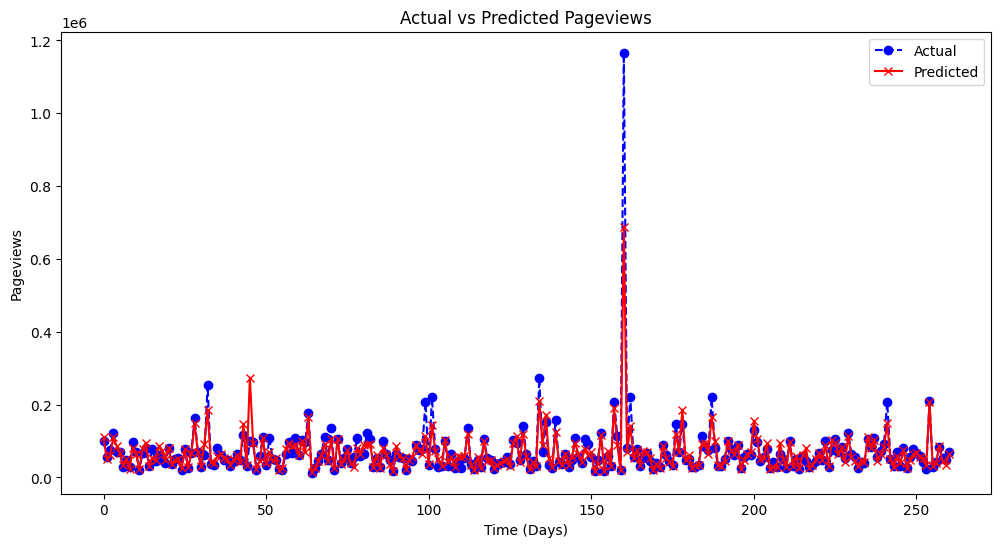

In [31]:
# Try Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}, R²: {r2:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual', marker='o', linestyle='--', color='blue')
plt.plot(y_pred, label='Predicted', marker='x', linestyle='-', color='red')
plt.title('Actual vs Predicted Pageviews')
plt.xlabel('Time (Days)')
plt.ylabel('Pageviews')
plt.legend()
plt.show()


### **Question 6: Test Whether Pageviews Have Increased Over Time**
- Compare mean pageviews in the first 30 days vs. the last 30 days.
- Perform a one-sample T-test

In [47]:
first_30_days = df['value'].head(30)
last_30_days = df['value'].tail(30)
# print(f"Mean of the first 30 days: {first_30_days:.2f}")
# print(f"Mean of the last 30 days: {last_30_days:.2f}")

# Perform one-sample t-test
t_stat, p_value = ttest_ind(last_30_days, first_30_days)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.2f}")

if p_value < 0.05:
    print("The means are significantly different.")
else:
    print("The means are not significantly different.")

T-statistic: 22.09, P-value: 0.00
The means are significantly different.


Name: Yue Zhang
Student ID: 2421832